In [1]:
###IU 2024 Revenue Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv('~/Downloads/100kArtists.csv')

In [5]:
display(df)

,Unnamed: 0.1,Unnamed: 0,Event Date,# Shows,Headliner,Support,Venue,City,State,Country,...,35 to 44 years population,45 to 54 years population,55 to 59 years population,60 to 64 years population,65 to 74 years population,75 to 84 years population,85 years and over population,Median age,Median income,Mean income
0,0,0,2024-06-09,1.0,Jackie Venson,NaN,City Winery Boston,Boston,Massachusetts,United States,...,86950,68883,36479,32331,48205,22488,11343,32.9,89212,132509
1,1,1,2024-06-09,1.0,Night Ranger,Mckinley James,Rialto Square Theatre,Joliet,Illinois,United States,...,21535,22300,8367,6446,9622,4029,1737,34.3,84971,99841
2,2,2,2024-06-09,1.0,The Silos,David Gans,The Loft @ City Winery NYC,New York,New York,United States,...,1192645,1072881,546121,498975,763022,398657,173960,37.5,76607,122667
3,3,3,2024-06-08,1.0,Alicia Witt,NaN,Haymarket Lounge @ City Winery Boston,Boston,Massachusetts,United States,...,86950,68883,36479,32331,48205,22488,11343,32.9,89212,132509
4,4,4,2024-06-08,1.0,Matt York,NaN,Haymarket Lounge @ City Winery Boston,Boston,Massachusetts,United States,...,86950,68883,36479,32331,48205,22488,11343,32.9,89212,132509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,5532,5532,2023-05-01,1.0,Storm Large,NaN,City Winery Chicago,Chicago,Illinois,United States,...,390000,322013,154928,147739,211359,104397,45392,35.3,71673,108346
5533,5533,5533,2023-05-01,1.0,100 gecs,"Fever Ray, Machine Girl",The Anthem,Washington,District of Columbia,United States,...,108199,72665,33926,33010,49028,25256,10167,34.8,101722,150292
5534,5534,5534,2023-05-01,1.0,Billy Idol,NaN,UPMC Events Center,Coraopolis,Pennsylvania,United States,...,973,469,230,255,711,320,105,37.4,55714,64596
5535,5535,5535,2023-05-01,1.0,Patti Lupone,NaN,Dell Hall At The Long Center,Austin,Texas,United States,...,162077,114844,48982,43577,59182,23940,10470,34.2,86556,122474


In [6]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Event Date', '# Shows', 'Headliner',
       'Support', 'Venue', 'City', 'State', 'Country', 'Market',
       'Company Type', 'Currency', 'Promoter', 'Genre', 'Avg. Tickets Sold',
       'Avg. Gross USD', 'Avg. Event Capacity', 'Avg. Capacity Sold',
       'Ticket Price Min', 'Ticket Price Max', 'Ticket Price Avg. USD', '字段21',
       'sp artist_name', 'sp artist_genre', 'sp followers', 'sp popularity',
       'yt name', 'yt Channel ID', 'yt Title', 'yt Description',
       'yt Published At', 'yt View Count', 'yt Subscriber Count',
       'yt Video Count', 'Location', 'Month', 'is_holiday', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'Total population', 'Under 5 years population',
       '5 to 9 years population', '10 to 14 years population',
       '15 to 19 years population', '20 to 24 years population',
       '25 to 34 years population', '35 to 44 years population',
       '

In [7]:
display(len(df.columns))

61

In [8]:
#we want to predict "Avg. Gross USD"
#Features from my intuition. I will find more accurate ones with a pearson correlation below.
features = ["Ticket Price Min", "Ticket Price Max", "sp followers", "yt View Count", "yt Subscriber Count","Avg. Event Capacity"]
prediction_col = ["Avg. Gross USD"]

In [9]:
df_with_ticket_price = df.columns[df.columns.str.contains(pat = 'Price')]

In [10]:
display(df_with_ticket_price)

Index(['Ticket Price Min', 'Ticket Price Max', 'Ticket Price Avg. USD'], dtype='object')

In [11]:
revenue_df = df[features+prediction_col]
display(revenue_df)

,Ticket Price Min,Ticket Price Max,sp followers,yt View Count,yt Subscriber Count,Avg. Event Capacity,Avg. Gross USD
0,25.0,35.0,60354.0,1.143849e+07,60700.0,288.0,2905.0
1,37.0,60.0,726155.0,6.680518e+07,77200.0,1840.0,65163.0
2,25.0,30.0,3464.0,3.073120e+05,1000.0,160.0,1200.0
3,30.0,35.0,3873.0,7.272910e+05,5700.0,75.0,2370.0
4,20.0,30.0,144.0,2.857000e+04,131.0,75.0,390.0
...,...,...,...,...,...,...,...
5532,22.0,35.0,12778.0,1.347848e+06,13500.0,304.0,6997.0
5533,45.0,75.0,609863.0,1.218393e+08,328000.0,3955.0,187905.0
5534,29.5,29.5,1991332.0,1.095648e+09,919000.0,3571.0,209061.5
5535,39.0,129.0,38083.0,1.716647e+06,3710.0,2425.0,96048.0


In [12]:
#checking total null count

print(df.isnull().sum().sum())

15266


In [13]:
# attempt to only get convert non null values to int, but problems arose.

# def str_to_int_not_null(series):
#     if series.notnull().any():
#         # Filter out null values and convert the remaining to integers
#         return series.dropna().astype(int)
#     else:
#         # Return an empty Series with the same type if all values are null
#         return pd.Series(dtype=int)

In [14]:
numeric_df = revenue_df.select_dtypes(include=['number'])

In [15]:
df.fillna(numeric_df.mean(axis = 1),inplace = True)        

In [16]:
print(numeric_df.isnull().sum().sum())
display(numeric_df)

0


,Ticket Price Min,Ticket Price Max,sp followers,yt View Count,yt Subscriber Count,Avg. Event Capacity,Avg. Gross USD
0,25.0,35.0,60354.0,1.143849e+07,60700.0,288.0,2905.0
1,37.0,60.0,726155.0,6.680518e+07,77200.0,1840.0,65163.0
2,25.0,30.0,3464.0,3.073120e+05,1000.0,160.0,1200.0
3,30.0,35.0,3873.0,7.272910e+05,5700.0,75.0,2370.0
4,20.0,30.0,144.0,2.857000e+04,131.0,75.0,390.0
...,...,...,...,...,...,...,...
5532,22.0,35.0,12778.0,1.347848e+06,13500.0,304.0,6997.0
5533,45.0,75.0,609863.0,1.218393e+08,328000.0,3955.0,187905.0
5534,29.5,29.5,1991332.0,1.095648e+09,919000.0,3571.0,209061.5
5535,39.0,129.0,38083.0,1.716647e+06,3710.0,2425.0,96048.0


In [17]:
# assign new features and target variable and prepare for training
new_features = ["Avg. Event Capacity", "Ticket Price Avg. USD", "Ticket Price Min", 
"sp popularity","yt View Count", "yt Subscriber Count", "sp followers"]

x = df[new_features]
y = df["Avg. Gross USD"]

print(x.dtypes)
print(y.dtypes)

Avg. Event Capacity      float64
Ticket Price Avg. USD    float64
Ticket Price Min         float64
sp popularity            float64
yt View Count            float64
yt Subscriber Count      float64
sp followers             float64
dtype: object
float64


In [18]:
#No need to use OneHotEncoder as there aren't any categotical columns. 

<Axes: xlabel='Ticket Price Min', ylabel='Density'>

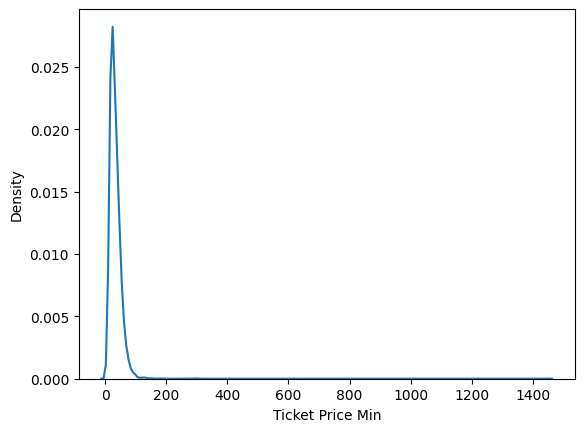

In [19]:
#perform EDA

sns.kdeplot(data = x["Ticket Price Min"])

,Ticket Price Min,Ticket Price Max,sp followers,yt View Count,yt Subscriber Count,Avg. Event Capacity,Avg. Gross USD
0,25.0,35.0,60354.0,1.143849e+07,60700.0,288.0,2905.0
1,37.0,60.0,726155.0,6.680518e+07,77200.0,1840.0,65163.0
2,25.0,30.0,3464.0,3.073120e+05,1000.0,160.0,1200.0
3,30.0,35.0,3873.0,7.272910e+05,5700.0,75.0,2370.0
4,20.0,30.0,144.0,2.857000e+04,131.0,75.0,390.0
...,...,...,...,...,...,...,...
5532,22.0,35.0,12778.0,1.347848e+06,13500.0,304.0,6997.0
5533,45.0,75.0,609863.0,1.218393e+08,328000.0,3955.0,187905.0
5534,29.5,29.5,1991332.0,1.095648e+09,919000.0,3571.0,209061.5
5535,39.0,129.0,38083.0,1.716647e+06,3710.0,2425.0,96048.0


<Axes: >

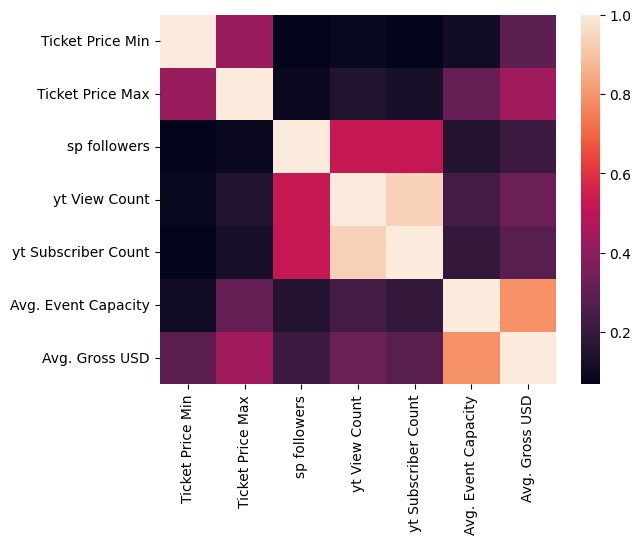

In [20]:
#Correlation matrix
display(numeric_df)
matrix = numeric_df.corr(method = "pearson")
sns.heatmap(matrix)

,index,Avg. Gross USD
0,Avg. Gross USD,1.000000
1,Avg. Event Capacity,0.787091
2,Ticket Price Avg. USD,0.608971
3,Ticket Price Max,0.442148
4,sp popularity,0.419652
5,yt View Count,0.323380
6,Ticket Price Min,0.292841
7,yt Subscriber Count,0.280967
8,sp followers,0.217438
9,Unnamed: 0.1,0.151224


<BarContainer object of 8 artists>

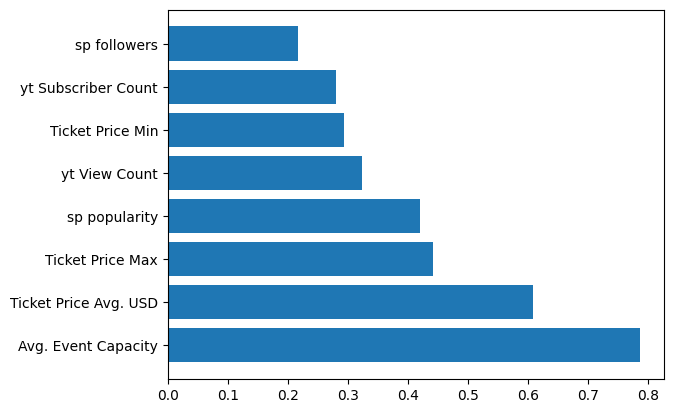

In [21]:
#Trying to find more features from all numerical columns that have high correlation with Avg. Gross USD. 
test_df = df.select_dtypes(include=['int', 'float'])
test_df.dropna(axis = 1, inplace = True)
#display(test_df)
test_mat = test_df.corr(method = "pearson").abs()
test_df = test_mat["Avg. Gross USD"].abs().sort_values(ascending = False).head(10).reset_index()
display(test_df)
plt.barh(test_df["index"][1:9],test_df["Avg. Gross USD"][1:9])


In [22]:
#we can see that the most correlated meaningful columns are "Avg. Event Capacity", "Ticket Price Avg. USD", "Ticket Price Min", 
#"sp popularity","yt View Count", "Ticket Price Min", "yt Subscriber Count", and "sp followers".

In [23]:
forestRegressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
forestRegressor.fit(x,y)

/Users/simonk/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [24]:
# Access the OOB Score
oob_score = forestRegressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = forestRegressor.predict(x)
 
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f'RMSE: {rmse}')
 
r2 = r2_score(y, predictions)
print(f'R^2: {r2}')

Out-of-Bag Score: 0.9012469070454812
RMSE: 12875.459313319443
R^2: 0.9859192388533604


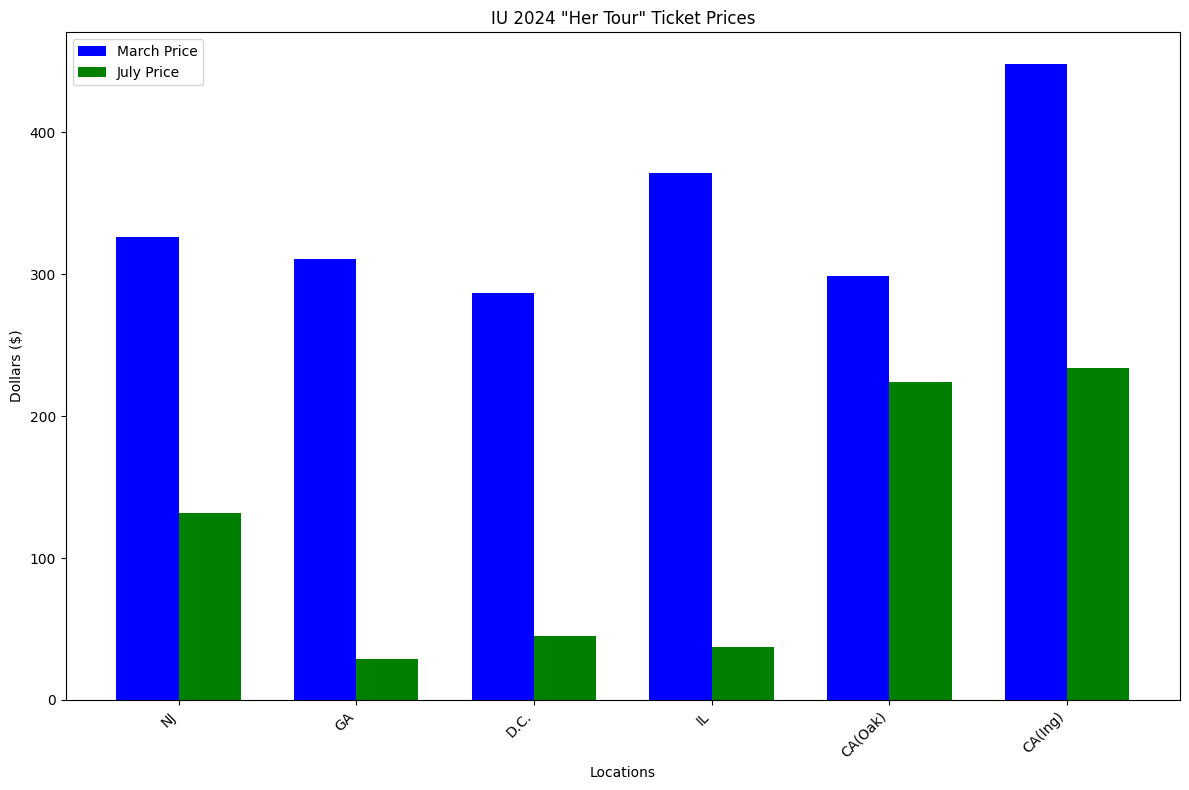

In [25]:
#Because the OOB score is very close to 1(0.90), it indicates that it will perform well on unseen data.

#According to IU's 2024 concert data, 
#There were
# Seoul, South Korea: KSPO Dome with 60,000 attendees over four nights.
# Taipei, Taiwan: Taipei Arena with 24,000 attendees over two nights.
# Singapore: Singapore Indoor Stadium with 17,400 attendees over two nights.
# Manila, Philippines: Philippine Arena with 37,000 attendees.
# London, England: OVO Arena Wembley with 10,000 attendees.
# Nonthaburi, Thailand: Impact Challenger Hall 1 with 28,000 attendees over two nights.

#To calculate the cost
#according to a table from https://nypost.com/2024/07/02/entertainment/iu-her-ticket-prices-dropping-where-to-buy-best-deals-schedule/,
# IU's 2024 World tour ticket price has been dropping since March. 
#Below are her 2024 World Tour ticket start price changes. from March to July
#I will abbreviate Oakland and Inglewood to CA(Oak) and CA(Ing) respectively. 
location = ["NJ","GA","D.C.","IL","CA(Oak)","CA(Ing)"]
march_price = [326,311,287,371,299,448]
july_price = [132,29,45,37,224,234]

n = len(location)
x = np.arange(n)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(12, 8))

#march ticket price
bars1 = ax.bar(x - bar_width/2, march_price, bar_width, label='March Price', color='b')
#july ticket price
bars2 = ax.bar(x + bar_width/2, july_price, bar_width, label='July Price', color='g')

ax.set_xlabel('Locations')
ax.set_ylabel('Dollars ($)')
ax.set_title('IU 2024 "Her Tour" Ticket Prices')
ax.set_xticks(x)
ax.set_xticklabels(location, rotation=45, ha='right')
ax.legend(loc="upper left")

# Display the bar graph
plt.tight_layout()
plt.show()

In [26]:
#From These results only show the starting price for the tickets. From research, the average ticket price range from the starting price+100 
#to starting price+300. It is okay to be not accurate with these values as few hundred is minimal in the larger scale, so I will use the 
#value of starting price+200

In [27]:
march_df = pd.DataFrame({"average march ticket price(USD)":march_price})
march_df = march_df + 200
display(march_df)

july_df = pd.DataFrame({"average july ticket price(USD)":july_price})
july_df = july_df + 200
display(july_df)

,average march ticket price(USD)
0,526
1,511
2,487
3,571
4,499
5,648


,average july ticket price(USD)
0,332
1,229
2,245
3,237
4,424
5,434


In [28]:
#For reference
# new_features = ["Avg. Event Capacity", "Ticket Price Avg. USD", "Ticket Price Min", 
# "sp popularity","yt View Count", "yt Subscriber Count", "sp followers"]

# x = df[new_features]

#print(df["sp popularity"])
#print(df["yt View Count"])

x_test = pd.DataFrame({
    "Avg. Event Capacity": [19200], "Ticket Price Avg. USD": [424], "Ticket Price Min": [234], "sp popularity": [294],
    "yt View Count": [3.022690325e+09], "yt Subscriber Count": [9730000], "sp followers": [5500000] })
gross_avenue_prediction = forestRegressor.predict(x_test)
print(gross_avenue_prediction)

[438270.72]


438270 dollars is an estimate of the H.E.R.E.H concert at OakL